In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

In [2]:
paragraph_data = pd.read_csv('transcript_paragraph_needed.csv')
paragraph_data = paragraph_data.drop(columns='Unnamed: 0')
paragraph_data = paragraph_data.reset_index()
paragraph_data

,index,comedian,transcript
0,0,andy woodhull,she told me she painted some clear cuz it make...
1,1,andy woodhull,we were on a road trip one time and she fell a...
2,2,andy woodhull,i mention my girls already theyre my theyre my...
3,3,andy woodhull,coopers you love the old bo you love the old b...
4,4,andy woodhull,my girls are teenagers now and got a couple ...
...,...,...,...
2835,2835,dave chappelle,lets not forget lets not forget ive never met ...
2836,2836,dave chappelle,ahah ahah in every ghetto ahah ahah ...
2837,2837,dave chappelle,ahah ahah in every ghetto ahah r...
2838,2838,dave chappelle,can i kick it yes you can can i kick...


In [3]:
# Text Processing
import re
import string
from nltk import word_tokenize, pos_tag
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [4]:
# nltk.download('wordnet')
# nltk.set_proxy('SYSTEM PROXY')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [5]:
def apply_data_cleansing(text):
    # Lowercase every words
    text = text.lower()
    # Remove every words with [blah blah blah] format
    text = re.sub('\[.*?\]', '', text)
    # Remove every words with (blah blah blah) format
    text = re.sub('\(.*?\)', '', text)
    # Get rid of the punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Get rid of all the numbers or words that contain numbers
    text = re.sub('\w*\d\w*', '', text)
    # Get rid of these specific punctuations
    text = re.sub('[‘’“”…]', '', text)
    # Get rid of '\n'
    text = re.sub('\n', '', text)
    
    # Tokenizes and lemmetizes (or stems) them
    tokenized = word_tokenize(text)
    stemmed = [porter_stemmer.stem(t) for t in tokenized]
    lemmetized = [wordnet_lemmatizer.lemmatize(t) for t in tokenized]
    return " ".join(lemmetized)

In [6]:
paragraph_data['transcript'] = paragraph_data['transcript'].apply(apply_data_cleansing)
paragraph_data

,index,comedian,transcript
0,0,andy woodhull,she told me she painted some clear cuz it make...
1,1,andy woodhull,we were on a road trip one time and she fell a...
2,2,andy woodhull,i mention my girl already theyre my theyre my ...
3,3,andy woodhull,cooper you love the old bo you love the old bu...
4,4,andy woodhull,my girl are teenager now and got a couple teen...
...,...,...,...
2835,2835,dave chappelle,let not forget let not forget ive never met bi...
2836,2836,dave chappelle,ahah ahah in every ghetto ahah ahah ahah in ev...
2837,2837,dave chappelle,ahah ahah in every ghetto ahah revolution ahah...
2838,2838,dave chappelle,can i kick it yes you can can i kick it yes yo...


# Data_Term_Matrix

In [7]:
documents = list(paragraph_data['transcript'])
len(documents)

2840

In [8]:
# Create the Document Term Matrix
# count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = TfidfVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=paragraph_data['index'])
df

,aaa,aaaa,aaaaaa,aaaaaah,aaaaave,aaaah,aaaahhh,aaagh,aaah,aaahhhh,...,zucker,zuckerberg,zuckerfuck,zuckerfucker,zuckermother,zuckzucker,zumba,zurich,zurr,zuul
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

In [9]:
data = df.to_numpy()
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# [n_components=0.9]

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
principalComponents_90percent = pca.fit_transform(data)
principalComponents_90percent

array([[-0.06396293,  0.07120097, -0.00919377, ...,  0.00773415,
         0.00254393,  0.01124017],
       [ 0.03760239, -0.09166885, -0.00759926, ..., -0.0020353 ,
        -0.00073644,  0.00913339],
       [-0.11428348, -0.14504434, -0.02577976, ...,  0.00413868,
        -0.00105126,  0.0053293 ],
       ...,
       [ 0.16372096,  0.01444161, -0.03869241, ...,  0.0029592 ,
         0.00162182, -0.00226143],
       [ 0.10834997, -0.06872753, -0.03313228, ...,  0.00369112,
        -0.00513115, -0.00031586],
       [ 0.10834997, -0.06872753, -0.03313228, ...,  0.00369112,
        -0.00513115, -0.00031586]])

In [11]:
principalComponents_90percent.shape

(2840, 1711)

# GMM 
<p> https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
<p> https://towardsdatascience.com/gaussian-mixture-models-gmm-6e95cbc38e6e (plot GMM)

### [Used AIC/BIC to find better number of n_components]
<p> https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
<p> https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

In [14]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
X = principalComponents_90percent
k = np.arange(1, 20)
models = [GMM(n_components=n, covariance_type='full', random_state=0).fit(X) for n in k]

plt.plot(k, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

NameError: name 'plt' is not defined

### Therefore, we pick k=4 in GMM

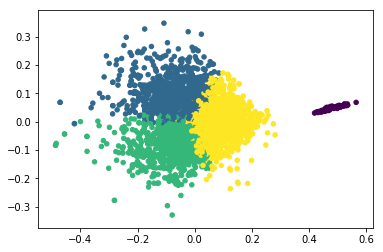

In [16]:
X = principalComponents_90percent
gmm = GMM(n_components=4, random_state=0).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20)

In [17]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([  61,  740,  812, 1227]))

# Classify attribute by labels

In [18]:
classified_paragraph_data = paragraph_data.copy()
classified_paragraph_data['style'] = labels
classified_paragraph_data

,index,comedian,transcript,style
0,0,andy woodhull,she told me she painted some clear cuz it make...,1
1,1,andy woodhull,we were on a road trip one time and she fell a...,3
2,2,andy woodhull,i mention my girl already theyre my theyre my ...,2
3,3,andy woodhull,cooper you love the old bo you love the old bu...,3
4,4,andy woodhull,my girl are teenager now and got a couple teen...,2
...,...,...,...,...
2835,2835,dave chappelle,let not forget let not forget ive never met bi...,1
2836,2836,dave chappelle,ahah ahah in every ghetto ahah ahah ahah in ev...,3
2837,2837,dave chappelle,ahah ahah in every ghetto ahah revolution ahah...,3
2838,2838,dave chappelle,can i kick it yes you can can i kick it yes yo...,3


In [20]:
classified_paragraph_data.drop(columns='index')

,comedian,transcript,style
0,andy woodhull,she told me she painted some clear cuz it make...,1
1,andy woodhull,we were on a road trip one time and she fell a...,3
2,andy woodhull,i mention my girl already theyre my theyre my ...,2
3,andy woodhull,cooper you love the old bo you love the old bu...,3
4,andy woodhull,my girl are teenager now and got a couple teen...,2
...,...,...,...
2835,dave chappelle,let not forget let not forget ive never met bi...,1
2836,dave chappelle,ahah ahah in every ghetto ahah ahah ahah in ev...,3
2837,dave chappelle,ahah ahah in every ghetto ahah revolution ahah...,3
2838,dave chappelle,can i kick it yes you can can i kick it yes yo...,3


## df_LDA_classify from others

In [21]:
df_LDA_classify = pd.read_pickle('./group.pkl')
df_LDA_classify

,result_1,result_2,result_3
0,"[0, 9, 17, 22, 23, 28, 32, 34, 35, 38, 40, 41,...","[0, 3, 4, 5, 15, 22, 23, 26, 28, 29, 44, 46, 4...","[0, 3, 16, 24, 25, 27, 34, 35, 41, 45, 46, 48,..."
1,"[1, 2, 3, 11, 13, 14, 15, 16, 21, 25, 26, 27, ...","[1, 10, 13, 20, 36, 39, 41, 42, 43, 45, 47, 49...","[1, 6, 7, 8, 13, 14, 17, 28, 31, 33, 36, 37, 3..."
2,"[4, 5, 10, 43, 44, 50, 53, 55, 62, 70, 75, 81,...","[2, 67, 82, 123, 165, 179, 266, 314, 316, 320,...","[2, 5, 10, 11, 15, 19, 21, 22, 47, 51, 64, 72,..."
3,"[6, 7, 8, 12, 18, 19, 20, 24, 42, 47, 48, 52, ...","[6, 7, 8, 9, 11, 12, 14, 16, 17, 18, 19, 21, 2...","[4, 9, 12, 18, 20, 23, 26, 29, 30, 32, 39, 58,..."


In [22]:
cnt = lambda x: len(x)
print(df_LDA_classify['result_1'].apply(cnt))
print(df_LDA_classify['result_2'].apply(cnt))
print(df_LDA_classify['result_3'].apply(cnt))

0    767
1    645
2    577
3    721
Name: result_1, dtype: int64
0     572
1     897
2     169
3    1072
Name: result_2, dtype: int64
0    590
1    851
2    673
3    596
Name: result_3, dtype: int64


In [23]:
label0 = list(classified_paragraph_data[classified_paragraph_data['style']==0].index)
label1 = list(classified_paragraph_data[classified_paragraph_data['style']==1].index)
label2 = list(classified_paragraph_data[classified_paragraph_data['style']==2].index)
label3 = list(classified_paragraph_data[classified_paragraph_data['style']==3].index)
# label0.comedian.unique()

In [24]:
group = [label0,label1,label2,label3]

In [25]:
lookup_table = pd.DataFrame()
lookup_table['Comedian'] = classified_paragraph_data['comedian']

In [26]:
def comedian2vec(groups, lookup_table):
    """
    :param groups: group should be a 2D matrix that contains transcript ids for each group.
    :param lookup_table: comedian-transcript_id table to look up which comedian an id is corresponeded to. This should have a "Comedian".
    """
    comedians = list(set(lookup_table.Comedian))
    comedian_vectors = {}
    for g_id, group in enumerate(groups):
        for i in group:
            com = lookup_table.iloc[i][0]
            if com not in comedian_vectors:
                comedian_vectors[com] = [0 for j in range(len(groups))]
            comedian_vectors[com][g_id] += 1
            
    for k, v in comedian_vectors.items():
        comedian_vectors[k] = np.divide(v, sum(v))        
            
    return comedian_vectors

In [27]:
comedian2vec(group, lookup_table)

{'bill burr': array([0.06870229, 0.19083969, 0.40458015, 0.33587786]),
 'jim jefferies': array([0.05806452, 0.4       , 0.18064516, 0.36129032]),
 'dave chappelle': array([0.19369369, 0.33333333, 0.15765766, 0.31531532]),
 'andy woodhull': array([0.        , 0.2962963 , 0.07407407, 0.62962963]),
 'ramy youssef': array([0.        , 0.58974359, 0.30769231, 0.1025641 ]),
 'chris rock': array([0.        , 0.02564103, 0.25641026, 0.71794872]),
 'jack whitehall': array([0.      , 0.28125 , 0.046875, 0.671875]),
 'vir das': array([0.        , 0.11111111, 0.33333333, 0.55555556]),
 'mark normand': array([0.        , 0.06382979, 0.5106383 , 0.42553191]),
 'bert kreischer': array([0.        , 0.67142857, 0.05714286, 0.27142857]),
 'chris d’elia': array([0.        , 0.21212121, 0.42424242, 0.36363636]),
 'jimmy o. yang': array([0.        , 0.32075472, 0.01886792, 0.66037736]),
 'hannah gadsby': array([0.        , 0.14754098, 0.2295082 , 0.62295082]),
 'joe rogan': array([0.        , 0.11267606, 0

In [30]:
test = comedian2vec(group, lookup_table)

In [31]:
dftest = pd.DataFrame(test.values(), index=test.keys(), columns=['style 1','style 2','style 3','style 4',])
dftest

,style 1,style 2,style 3,style 4
bill burr,0.068702,0.190840,0.404580,0.335878
jim jefferies,0.058065,0.400000,0.180645,0.361290
dave chappelle,0.193694,0.333333,0.157658,0.315315
andy woodhull,0.000000,0.296296,0.074074,0.629630
ramy youssef,0.000000,0.589744,0.307692,0.102564
chris rock,0.000000,0.025641,0.256410,0.717949
jack whitehall,0.000000,0.281250,0.046875,0.671875
vir das,0.000000,0.111111,0.333333,0.555556
mark normand,0.000000,0.063830,0.510638,0.425532
bert kreischer,0.000000,0.671429,0.057143,0.271429


In [32]:
dftest.to_pickle('./comedians_vector.pkl')